# Kernel Fisher LDA on circles

In [1256]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

In [1257]:
np.random.seed(0)

In [1258]:
# Try other kernel
# Try XOR 
# move to 3 dimensions and up.

In [1259]:

# random data circle, x^2 + y^2 < 0.5 = inside cirlce
m = 200
circle_data = np.random.normal(0, 1, (m, 2))
circle_class_data = [[], [], []]
circle_labels = []
circle_labels_indices = [[], [], []]
for i, d in enumerate(circle_data):
    x = d[0]
    y = d[1]
    if np.sqrt(x**2 + y**2) < 0.5:
        circle_labels.append(0)
        circle_class_data[0].append((x, y))
        circle_labels_indices[0].append(i)
    elif np.sqrt(x**2 + y**2) < 1:
        circle_labels.append(1)
        circle_class_data[1].append((x, y))
        circle_labels_indices[1].append(i)
    else:
        circle_labels.append(2)
        circle_class_data[2].append((x, y))
        circle_labels_indices[2].append(i)



In [1260]:
"""
# random data circle, x^2 + y^2 < 0.5 = inside cirlce
m = 200
circle_data = np.random.normal(0, 1, (m, 2))
circle_class_data = [[], []]
circle_labels = []
circle_labels_indices = [[], []]
for i, d in enumerate(circle_data):
    x = d[0]
    y = d[1]
    if (d[0] > 0 and d[1] > 0) or (d[0] < 0 and d[1] < 0):
        circle_labels.append(1)
        circle_class_data[1].append((x, y))
        circle_labels_indices[1].append(i)
    else:
        circle_labels.append(0)
        circle_class_data[0].append((x, y))
        circle_labels_indices[0].append(i)
"""



'\n# random data circle, x^2 + y^2 < 0.5 = inside cirlce\nm = 200\ncircle_data = np.random.normal(0, 1, (m, 2))\ncircle_class_data = [[], []]\ncircle_labels = []\ncircle_labels_indices = [[], []]\nfor i, d in enumerate(circle_data):\n    x = d[0]\n    y = d[1]\n    if (d[0] > 0 and d[1] > 0) or (d[0] < 0 and d[1] < 0):\n        circle_labels.append(1)\n        circle_class_data[1].append((x, y))\n        circle_labels_indices[1].append(i)\n    else:\n        circle_labels.append(0)\n        circle_class_data[0].append((x, y))\n        circle_labels_indices[0].append(i)\n'

In [1261]:
# separate data by class
circle_class_data

[[(-0.10321885179355784, 0.41059850193837233),
  (0.04575851730144607, -0.1871838500258336),
  (0.1549474256969163, 0.37816251960217356),
  (-0.3479121493261526, 0.15634896910398005),
  (-0.3873268174079523, -0.30230275057533557),
  (-0.028182228338654868, 0.42833187053041766),
  (0.06651722238316789, 0.3024718977397814),
  (0.17742614225375283, -0.4017809362082619),
  (-0.31155253212737266, 0.05616534222974544),
  (0.12691209270361992, 0.40198936344470165),
  (-0.45553250351734315, 0.01747915902505673),
  (-0.3691818379424436, -0.2393791775759264),
  (0.27992459904323824, -0.09815038964295794),
  (-0.017020413861440594, 0.3791517355550818),
  (0.1565065379653756, 0.23218103620027578),
  (-0.13288057758695562, -0.2977908794017283),
  (0.14195316332077967, -0.3193284171450952),
  (-0.3108861716984717, 0.09740016626878341),
  (-0.38487980918127546, 0.094351589317074),
  (-0.042171451290578935, -0.2868871923899076),
  (-0.0616264020956474, -0.10730527629117469),
  (-0.3646935443916854, 0.

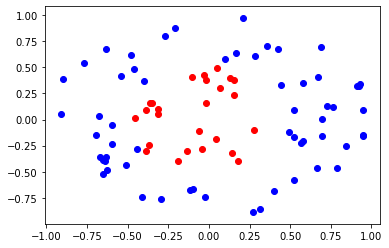

In [1262]:
# circles
plt.scatter(np.array(circle_class_data[0])[:, :1], np.array(circle_class_data[0])[:, 1:], color='red')
plt.scatter(np.array(circle_class_data[1])[:, :1], np.array(circle_class_data[1])[:, 1:], color='blue')
#plt.scatter(ex1, np.zeros(len(ex1)), color='blue')

#plt.scatter(data[:,:1], data[:,1:])

In [1263]:

# Quadratic Kernel
def quadratic_kernel(x_1, x_2):
    return (np.matmul(x_1.T, x_2) + 1)**3

chosen_kernel = sklearn.metrics.pairwise.rbf_kernel #sklearn.metrics.pairwise.rbf_kernel
#chosen_kernel = quadratic_kernel

In [1264]:
chosen_kernel(np.array([[1, 2], [3, 4]]))

array([[1.        , 0.01831564],
       [0.01831564, 1.        ]])

In [1265]:
#kernel_matrix = chosen_kernel(circle_data)

In [1266]:
"""
# kernel LDA get kernels from scikit learn
chosen_kernel = quadratic_kernel

kernel_matrix = [] #this is a vector!
for i, ccd in enumerate(circle_class_data):
    kernel_matrix.append([])
    for j, cid in enumerate(circle_data):
        M_ij = 0
        for ccd_w in ccd:
            M_ij += chosen_kernel(cid, ccd_w)
        M_ij = M_ij/float(len(ccd))
        kernel_matrix[i].append(M_ij)
kernel_matrix = np.array(kernel_matrix)

kernel_mean_total = np.sum(kernel_matrix, axis=0)
  
M = None

# What is happening!
for cd in kernel_matrix:
    n = len(cd)
    M_i = np.mean(cd, axis=0)
    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))
    if S_B is None:
        S_B = n*np.dot(temp, temp.T)
        #print(S_B)
        continue
    #print("new addition", n*np.dot(temp, temp.T))
    S_B += n*np.dot(temp, temp.T)
    #print(S_B)
print(S_B) 
"""


'\n# kernel LDA get kernels from scikit learn\nchosen_kernel = quadratic_kernel\n\nkernel_matrix = [] #this is a vector!\nfor i, ccd in enumerate(circle_class_data):\n    kernel_matrix.append([])\n    for j, cid in enumerate(circle_data):\n        M_ij = 0\n        for ccd_w in ccd:\n            M_ij += chosen_kernel(cid, ccd_w)\n        M_ij = M_ij/float(len(ccd))\n        kernel_matrix[i].append(M_ij)\nkernel_matrix = np.array(kernel_matrix)\n\nkernel_mean_total = np.sum(kernel_matrix, axis=0)\n  \nM = None\n\n# What is happening!\nfor cd in kernel_matrix:\n    n = len(cd)\n    M_i = np.mean(cd, axis=0)\n    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))\n    if S_B is None:\n        S_B = n*np.dot(temp, temp.T)\n        #print(S_B)\n        continue\n    #print("new addition", n*np.dot(temp, temp.T))\n    S_B += n*np.dot(temp, temp.T)\n    #print(S_B)\nprint(S_B) \n'

In [1267]:
"""
kernel_matrix = []
for i in range(len(circle_data)):
    kernel_matrix.append([])
    for j in range(len(circle_data)):
        kernel_matrix[i].append(chosen_kernel(np.reshape(circle_data[i], (2, 1)), np.reshape(circle_data[j], (2, 1)))[0][0])
kernel_matrix = np.array(kernel_matrix)
"""
kernel_matrix = chosen_kernel(np.reshape(circle_data, (m, 2)))

In [1268]:
kernel_matrix

array([[1.        , 0.1349955 , 0.38518928, ..., 0.06154074, 0.50407317,
        0.86366028],
       [0.1349955 , 1.        , 0.00379788, ..., 0.00492053, 0.54222811,
        0.3386663 ],
       [0.38518928, 0.00379788, 1.        , ..., 0.09491478, 0.06370789,
        0.17298839],
       ...,
       [0.06154074, 0.00492053, 0.09491478, ..., 1.        , 0.08450812,
        0.05792636],
       [0.50407317, 0.54222811, 0.06370789, ..., 0.08450812, 1.        ,
        0.79703168],
       [0.86366028, 0.3386663 , 0.17298839, ..., 0.05792636, 0.79703168,
        1.        ]])

In [1269]:
class_kernel_matrix = [[] for i in range(len(circle_class_data))]
for i, l in enumerate(circle_labels):
    class_kernel_matrix[l].append(kernel_matrix[i])

In [1270]:
np.shape(kernel_matrix)

(200, 200)

In [1271]:
class_kernel_matrix

[[array([0.1749237 , 0.1043187 , 0.05474435, 0.49035522, 1.        ,
         0.5625934 , 0.66020287, 0.85846612, 0.23101826, 0.4121479 ,
         0.04830509, 0.32219123, 0.01051926, 0.82715018, 0.14975847,
         0.96671557, 0.04212316, 0.93963966, 0.30041733, 0.74492423,
         0.11974311, 0.08450376, 0.64228908, 0.48284099, 0.26306579,
         0.73043943, 0.25948125, 0.99703193, 0.97995282, 0.6439962 ,
         0.63217768, 0.0792515 , 0.69117586, 0.31123882, 0.67869194,
         0.67975479, 0.11934196, 0.48299175, 0.45653402, 0.91895981,
         0.5045893 , 0.12784838, 0.09353363, 0.36931   , 0.50898625,
         0.68760904, 0.8116264 , 0.86121611, 0.38590945, 0.97383131,
         0.02963668, 0.43284186, 0.17422161, 0.48737674, 0.07243799,
         0.12685431, 0.24378051, 0.91360837, 0.49080862, 0.67832427,
         0.28505353, 0.60658091, 0.71764709, 0.33622687, 0.74028828,
         0.79412207, 0.79071469, 0.83762904, 0.65534891, 0.28504455,
         0.38146343, 0.94025326, 0

In [1272]:
k_matrix = np.mean(kernel_matrix, axis=0)

In [1273]:
k_matrix

array([0.20497412, 0.10059782, 0.14969198, 0.37764052, 0.48031602,
       0.28221823, 0.41402489, 0.45093671, 0.26226922, 0.40247068,
       0.09943473, 0.34486355, 0.07488727, 0.49804558, 0.15181666,
       0.47454744, 0.16478564, 0.49417506, 0.22250194, 0.48686597,
       0.2468773 , 0.10949307, 0.46598804, 0.31328484, 0.27887025,
       0.41605353, 0.34700102, 0.47729249, 0.4864001 , 0.45924987,
       0.45471582, 0.21497703, 0.4758391 , 0.26680122, 0.43083671,
       0.41946525, 0.23075136, 0.42028832, 0.40473962, 0.49952116,
       0.31236555, 0.25559063, 0.10866406, 0.3295488 , 0.30400509,
       0.33434845, 0.37854371, 0.41489533, 0.21770966, 0.47383422,
       0.11955065, 0.28610847, 0.15307293, 0.43349341, 0.1104713 ,
       0.1607331 , 0.17834271, 0.42117943, 0.37810018, 0.35024686,
       0.35110001, 0.30108456, 0.46288956, 0.2057163 , 0.41184937,
       0.41946488, 0.46700716, 0.41746409, 0.44275546, 0.3504974 ,
       0.29718636, 0.44127187, 0.0936739 , 0.31405656, 0.33114

In [1274]:
np.shape(kc_matrix)

(3, 200)

In [1275]:
kc_matrix = [] #L x 1 x n classes. 
for i, ccd in enumerate(circle_class_data):
    kc_matrix.append([])
    for j, cid in enumerate(circle_data):
        # sum up the length
        n = len(ccd)
        kc_matrix[i].append(1/float(n)*sum([chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0] for ccd_w in ccd]))
kc_matrix = np.array(kc_matrix)


In [1276]:
kj_matrix = [] #N x L x Li. 
for i, ccd in enumerate(circle_class_data):
    kj_matrix.append([])
    for j, cid in enumerate(circle_data):
        kj_matrix[i].append([])
        for k, ccd_w in enumerate(ccd):
            kj_matrix[i][j].append(chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0])

#kj_matrix = np.array(kj_matrix)


In [1277]:
np.shape(kj_matrix)

(3, 200)

In [1278]:
np.shape(kc_matrix)

(3, 200)

In [1279]:
np.shape(k_matrix)

(200,)

In [1280]:
def kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix):
    M = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        #pdb.set_trace()
        temp = np.reshape(np.sum(ckm - k_matrix, axis=0), (m, 1))
        if M is None:
            M = 1/float(n)*np.matmul(temp, temp.T)
            continue
        M += 1/(float(n))*np.matmul(temp, temp.T)
    return M
        

    

In [1281]:
M = kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix)

In [1282]:
np.shape(M)

(200, 200)

In [1283]:
def kernel_within_matrix(kernel_matrix, class_kernel_matrix):
    N = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if N is None:
            #pdb.set_trace()
            test = np.matmul(np.transpose(ckm), mid)
            N = np.matmul(test, ckm)
            continue
        N += np.matmul(np.matmul(np.transpose(ckm), mid), ckm)
    eps=1*np.diag(np.repeat(100, m))
    return N + eps

In [1284]:
N = kernel_within_matrix(kernel_matrix, class_kernel_matrix)

(25, 25)
(59, 59)
(116, 116)


In [1285]:
np.shape(M)

(200, 200)

In [1286]:
"""
import pdb
def kernel_between_matrix(kc_matrix, k_matrix, class_data):
    kernel_S_B = None
    k_kt = np.matmul(np.reshape(k_matrix, (m, 1)), np.reshape(k_matrix, (m, 1)).T)
    for i, kc in enumerate(kc_matrix):
        n = len(class_data[i])
        if kernel_S_B is None:
            #kernel_S_B = n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
            temp = (np.reshape(kc, (m, 1)) - k_kt)
            kernel_S_B = n*np.matmul(temp, temp.T)
            continue
        #kernel_S_B += n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
        temp = (np.reshape(kc, (m, 1)) - k_kt)
        kernel_S_B += n*np.matmul(temp, temp.T)
    return kernel_S_B
    
def kernel_within_matrix(kernel_matrix, kc_matrix, class_data):
    rhs = None
    for i, kc in enumerate(kc_matrix):
        n = len(class_data[i])
        
        if rhs is None:
            rhs = n*np.dot(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) 
            continue
        rhs += n*np.dot(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T)
    return kernel_matrix **2 - rhs 

def kernel_within_matrix2(kj_matrix, class_data, g):
    rhs = None
    for i, kj in enumerate(kj_matrix):
        n = len(class_data[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if rhs is None:
            #pdb.set_trace()
            test = np.matmul(np.reshape(kj, (m, n)), mid)
            rhs = np.matmul(test, np.reshape(kj, (m, n)).T)
            continue
        rhs += np.matmul(np.matmul(kj, mid), np.transpose(kj))
    eps=g*np.diag(np.repeat(100, m))
    return rhs + eps
"""

'\nimport pdb\ndef kernel_between_matrix(kc_matrix, k_matrix, class_data):\n    kernel_S_B = None\n    k_kt = np.matmul(np.reshape(k_matrix, (m, 1)), np.reshape(k_matrix, (m, 1)).T)\n    for i, kc in enumerate(kc_matrix):\n        n = len(class_data[i])\n        if kernel_S_B is None:\n            #kernel_S_B = n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt\n            temp = (np.reshape(kc, (m, 1)) - k_kt)\n            kernel_S_B = n*np.matmul(temp, temp.T)\n            continue\n        #kernel_S_B += n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt\n        temp = (np.reshape(kc, (m, 1)) - k_kt)\n        kernel_S_B += n*np.matmul(temp, temp.T)\n    return kernel_S_B\n    \ndef kernel_within_matrix(kernel_matrix, kc_matrix, class_data):\n    rhs = None\n    for i, kc in enumerate(kc_matrix):\n        n = len(class_data[i])\n        \n        if rhs is None:\n            rhs = n*np.dot(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) \n        

In [1287]:
N

array([[111.66834677,   2.73392395,   5.18731126, ...,  -5.47027102,
          8.216669  ,  11.44384094],
       [  2.73392395, 105.15303846,  -1.36832793, ...,  -4.53981456,
          6.69795614,   5.01370152],
       [  5.18731126,  -1.36832793, 108.61945748, ...,  -0.72674984,
         -0.11788555,   2.74392069],
       ...,
       [ -5.47027102,  -4.53981456,  -0.72674984, ..., 113.61727256,
         -8.23637831,  -7.016518  ],
       [  8.216669  ,   6.69795614,  -0.11788555, ...,  -8.23637831,
        113.20714485,  11.37185222],
       [ 11.44384094,   5.01370152,   2.74392069, ...,  -7.016518  ,
         11.37185222, 112.97466502]])

In [1288]:
M

array([[ 0.34583601, -0.10690061,  0.09403544, ...,  0.64146745,
         0.46485942,  0.37087351],
       [-0.10690061,  0.1156462 ,  0.05051417, ..., -0.69805668,
        -0.33530181, -0.16022015],
       [ 0.09403544,  0.05051417,  0.10223957, ..., -0.30707528,
        -0.0582033 ,  0.05693014],
       ...,
       [ 0.64146745, -0.69805668, -0.30707528, ...,  4.21362641,
         2.02154584,  0.96368469],
       [ 0.46485942, -0.33530181, -0.0582033 , ...,  2.02154584,
         1.06931802,  0.60424493],
       [ 0.37087351, -0.16022015,  0.05693014, ...,  0.96368469,
         0.60424493,  0.42287497]])

In [1289]:
np.shape(kernel_S_B)

(200, 200)

In [1290]:
# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(N), M))
eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [1291]:
w_circle_kernel = eig_pairs[0][1]

In [1292]:
eig_pairs[0]

(2.1641430998660804,
 array([-0.0210586 +0.j, -0.03025756+0.j, -0.0272885 +0.j,  0.05703   +0.j,
         0.1372499 +0.j, -0.02322412+0.j,  0.08949394+0.j,  0.12163773+0.j,
        -0.00863233+0.j,  0.04948545+0.j, -0.0130479 +0.j,  0.01927759+0.j,
        -0.00525884+0.j,  0.15460556+0.j, -0.02969029+0.j,  0.13986239+0.j,
        -0.03684364+0.j,  0.13921583+0.j, -0.02872701+0.j,  0.11809548+0.j,
        -0.04917571+0.j, -0.00563306+0.j,  0.08702715+0.j, -0.01866585+0.j,
        -0.04933978+0.j,  0.04439091+0.j, -0.01184229+0.j,  0.13674621+0.j,
         0.15011127+0.j,  0.07663593+0.j,  0.07075285+0.j, -0.04400192+0.j,
         0.12871783+0.j, -0.03911046+0.j,  0.0496953 +0.j,  0.09428324+0.j,
        -0.03551777+0.j,  0.0716614 +0.j,  0.01761952+0.j,  0.1451446 +0.j,
        -0.01686995+0.j, -0.03728627+0.j, -0.02436135+0.j,  0.02382952+0.j,
        -0.01806999+0.j,  0.0010643 +0.j,  0.04254876+0.j,  0.08082662+0.j,
        -0.04260971+0.j,  0.13818229+0.j, -0.02288907+0.j, -0.02559

/home/kchow/anaconda3/envs/obspy/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


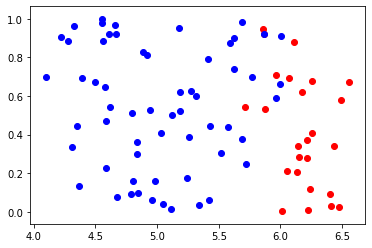

In [1293]:
# Visualize what it looks like.
ex_circle_0 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[0]])
ex_circle_1 = np.array([np.dot(w_circle_kernel, d) for d in class_kernel_matrix[1]])
plt.scatter(ex_circle_0, np.random.rand(len(ex_circle_0)), color='red')
plt.scatter(ex_circle_1, np.random.rand(len(ex_circle_1)), color='blue')

# dope!

In [1294]:
w_circle_kernel = [eig_pairs[0][1], eig_pairs[1][1]]

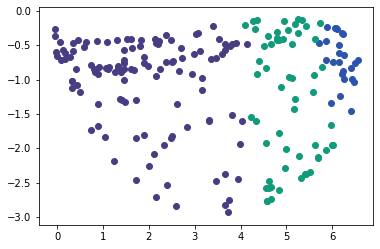

In [1295]:
# Visualize what it looks like.
for i, j in enumerate(circle_class_data):
    ex_circle_0 = np.array([np.matmul(w_circle_kernel, np.reshape(d, (m, 1))) for d in class_kernel_matrix[i]])
    plt.scatter(ex_circle_0[:, :1], ex_circle_0[:, 1:], color=np.random.rand(3,))

    
# dope!

In [1296]:
np.shape(kc_matrix)

(3, 200)

In [1297]:
# Try XOR or circle for my other guy.

In [1298]:
# extend to 3 dimensions